

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

5) Linear Regression

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm and a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [5]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [25]:
#from scipy.stats import ttest_1samp
import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats
#print('Mean is %2.1f Sd is %2.1f' % (GPU1.mean(),np.std(GPU1,ddof = 1)))

#t_statistics, p_value = ttest_1samp(GPU1 , GPU1.mean())
#print(t_statistics, p_value)

t_statistics, p_value = stats.ttest_ind(GPU1, GPU2)
#print('statistics value %1.3f p value %1.3f' % ( t_statistics   ,p_value))

#print('p value %1.3f'% p_value)

if(p_value * 100 < 5):
    print('There is significant difference between GPU1 & GPU2  with p value %1.2f %%'% (p_value*100) )
else:
    print('there is no significance')

There is significant difference between GPU1 & GPU2  with p value 1.38 %


## Question 2 

He is trying a third GPU - GPU3.

In [27]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [30]:
t_statistics, p_value = stats.ttest_ind(GPU1, GPU3)
#print('statistics value %1.3f p value %1.3f' % ( t_statistics   ,p_value))

#print('p value %1.3f'% p_value)

if(p_value * 100 < 5):
    print('There is significant difference between GPU1 & GPU3 with p value %1.2f %%'% (p_value*100) )
else:
    print('there is no significance between GPU1 & GPU3 with p value %1.2f %%' % (p_value*100))

there is no significance between GPU1 & GPU3 with p value 14.51 %


### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [99]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

#### Answer:

In [118]:
import scipy.stats as stats
from scipy.stats import levene

import numpy as np
w, p_value = stats.levene(np.array(e1).reshape(len(e1)),np.array(e2).reshape(len(e2)) , np.array(e3).reshape(len(e3)))
#w, p_value = stats.levene(e1.to_numpy(),e2.to_numpy())
#e1.index.to_numpy()
#e1.to_numpy(copy=True)
#np.array(e1.to_records())
#w, p_value = stats.levene(np.array(e1.to_records()),np.array(e2.to_records()))
#e1.to_array()
#ra = e1.to_records(index=False)
#np.asarray(ra)
#e1.values
#np.asarray(e1.values)
#np.array(e1).reshape(len(e1))
print(w,p_value)
#np.array(e2).reshape(len(e2))
print('Since p value is > 5%, hence homogeneity of variances is met in above sample data, now going for anova')

all_exp = pd.DataFrame()
all_exp = pd.concat([e1,e2,e3],axis=1,join_axes=[e1.index])
all_exp.columns=['e1','e2','e3']
#print(all_exp)
#print(all_exp.var(ddof=0))
#print(all_exp.var())
import seaborn as sns
import matplotlib.pyplot as plt
#sns.boxplot(data=all_exp)
#plt.show()
#all_exp_anov = ['exp_type']
#e1_type = pd.concat([{'Exp_Type':'e1'},e1])
df1            = pd.DataFrame({'Exp_Type': 'e1', 'Values':np.array(e1).reshape(len(e1))})
#print(df1)
#e1['exp_type'] = 'e1'
e1_type=e1.copy()
e1_type['exp_type']='e1'

e2_type=e2.copy()
e2_type['exp_type']='e2'

e3_type=e3.copy()
e3_type['exp_type']='e3'

exp_types = pd.concat([e1_type,e2_type,e3_type], axis=0, )
exp_types.columns=['value', 'exptyp']
exp_types.reset_index()

import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('value ~ exptyp', data=exp_types).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
print(aov_table)
print('since p value is >5, hence accept accept null hypothesis, ie not much evidence to prove means are different')

2.6741725711150446 0.12259792666001798
Since p value is > 5%, hence homogeneity of variances is met in above sample data, now going for anova
           df    sum_sq   mean_sq         F    PR(>F)
exptyp    2.0  2.399066  1.199533  2.513576  0.135746
Residual  9.0  4.294994  0.477222       NaN       NaN
since p value is >5, hence accept accept null hypothesis, ie not much evidence to prove means are different


## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [125]:
print('Type I is the conditional probability of rejecting null hypothesis based on the sample when null hypothesis is true for population studied, leading to false alarm - false positive.')
print('p(reject null hypothesis|Ho is true)')
print('')
print('Type II is the conditional probability of accepting[fail to reject] null hypothesis based on the sample when null hypothesis is false, leading to potential threat or missed opportunity')
print('p(retain null hypothesis|Ho is true)')

Type I is the conditional probability of rejecting null hypothesis based on the sample when null hypothesis is true for population studied, leading to false alarm - false positive.
p(reject null hypothesis|Ho is true)

Type II is the conditional probability of accepting[fail to reject] null hypothesis based on the sample when null hypothesis is false, leading to potential threat or missed opportunity
p(retain null hypothesis|Ho is true)


## Question 5 

Explain how the higher confidence value effects TypeI and TypeII error.

#### Answer:


In [127]:
print('Hihger confidence ie lower significance level will not have much impact on Type I Error')

print('Hihger confidence ie lower significance level will have significant statistical impact on Type II Error')

Hihger confidence ie lower significance level will not have much impact on Type I Error
Hihger confidence ie lower significance level will have significant statistical impact on Type II Error


## Question 6 

*A computer expert wants to test the null hypothesis that a new GPU is no more effective than the older model.*

Lets consider that he selects the GPU which he think is more effective.

Now, find out which GPU he has selected if he made Type I error. And give reasoning about which is more effective.

**Answer:**

In [129]:
print('null hypothesis is GPU_OLD_Effectiveness = GPU_NEW_Effectiveness')
print('Type I error means reject null hypothesis in the sample selected, when actually the null hypothesis is true for population studied')
print('Hence the sample GPU he has selected is significantly effective, ie accept alternate hypothesis ie reject null hypothesis')

null hypothesis is GPU_OLD_Effectiveness = GPU_NEW_Effectiveness
Type I error means reject null hypothesis in the sample selected, when actually the null hypothesis is true for population studied
Hence the sample GPU he has selected is significantly effective, ie accept alternate hypothesis ie reject null hypothesis


## Question 7 

From question6, if he made Type II error.

*Now, find out which GPU he has selected. And give reasoning about which is more effective.*

#### Answer:

In [130]:
print('null hypothesis is GPU_OLD_Effectiveness = GPU_NEW_Effectiveness')
print('Type II error means accept null hypothesis in the sample selected, when actually the null hypothesis is false for population studied')
print('Hence the sample GPU he has selected is NOT significantly effective, ie accept null hypothesis ie reject alternate hypothesis')

null hypothesis is GPU_OLD_Effectiveness = GPU_NEW_Effectiveness
Type II error means accept null hypothesis in the sample selected, when actually the null hypothesis is false for population studied
Hence the sample GPU he has selected is NOT significantly effective, ie accept null hypothesis ie reject alternate hypothesis


# Linear Regression


# Simple Linear Regression

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [150]:
import numpy as np
import pandas as pd
missing_values = ["n/a", "na", "--"]
data = pd.read_csv('bigcity.csv', na_values = missing_values)
type(data)
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input and target variables into X and Y.
Hint: You can shape function to get the size of the dataframe

---------------------------------------
rows and columns total is --->   (49, 3)
---------------------------------------


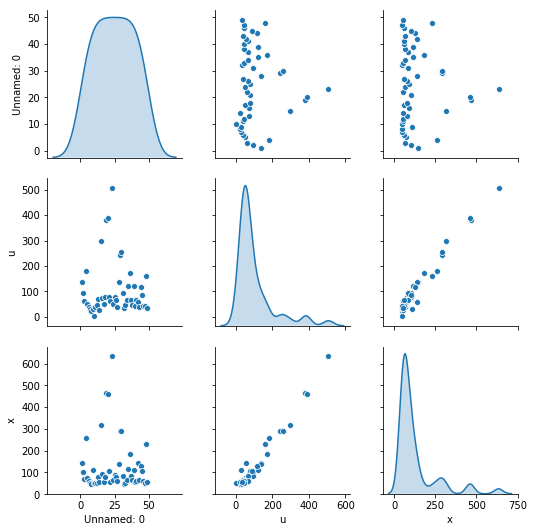

In [151]:
#data.info()
print('---------------------------------------')
print('rows and columns total is --->  ' ,data.shape)
print('---------------------------------------')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.pairplot( data , diag_kind='kde')

X = data[['u']]

Y = data[['x']]

## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [155]:
data.isna().sum()

Unnamed: 0    0
u             0
x             0
dtype: int64

            Unnamed: 0         u         x
Unnamed: 0    1.000000 -0.024788 -0.047890
u            -0.024788  1.000000  0.981742
x            -0.047890  0.981742  1.000000


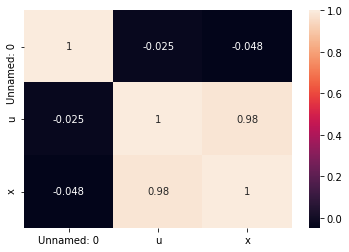

In [158]:
print(data.corr())

sns.heatmap( data.corr(), annot=True)

### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(39, 1)
(10, 1)
(39, 1)
(10, 1)


# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg_x_train = LinearRegression()
linreg_x_test = LinearRegression()


linreg_x_train.fit(x_train, y_train)


b0_intercept = linreg_x_train.intercept_

b1_slope = linreg_x_train.coef_

print('intercept c of train set',b0_intercept)
print('coef m slope of train set',b1_slope)



intercept c of train set [9.71845532]
coef m slope of train set [[1.15945123]]


# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

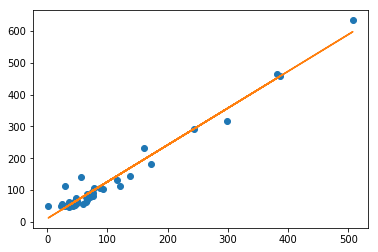

In [194]:
import matplotlib.pyplot as plt

line = b1_slope* x_train + b0_intercept

plt.plot(x_train, y_train, 'o', x_train,line)

#line_test = b1_slope* x_test + b0_intercept
#plt.plot(x_test, y_test,'o', x_test,line_test)

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [197]:
predictedninetnthirty_train=linreg_x_train.predict(x_train)
mse = metrics.mean_squared_error(predictedninetnthirty_train, y_train)
print('mean squared error of train set', mse)
trainRmse = np.sqrt(mse)
print('Rmse of train set', trainRmse )

print('R2 score of train set',linreg_x_train.score(x_train, y_train))
print('----------------------------------')

predictedninetnthirty_test=linreg_x_train.predict(x_test)
mse = metrics.mean_squared_error(predictedninetnthirty_test, y_test)
print('mean squared error of test set', mse)
trainRmse = np.sqrt(mse)
print('Rmse of test set', trainRmse )
print('R2 score of test set',linreg_x_train.score(x_test, y_test))



mean squared error of train set 537.7499996894286
Rmse of train set 23.18943724391406
R2 score of train set 0.9682175540860046
----------------------------------
mean squared error of test set 546.869224903266
Rmse of test set 23.385235190249123
R2 score of test set 0.9181922560396981


## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [198]:
print('score of train set',linreg_x_train.score(x_train, y_train))


score of train set 0.9682175540860046


In [199]:
print('score of test set',linreg_x_train.score(x_test, y_test))

score of test set 0.9181922560396981
